In [136]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import matplotlib.pyplot as plot
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from keras.utils import np_utils
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn import preprocessing 
from sklearn.metrics import f1_score
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from keras.utils import np_utils
from sklearn.preprocessing import label_binarize
from itertools import cycle
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_curve, auc

from itertools import cycle, permutations

In [137]:
dataset = pd.read_csv("car_evaluation.csv")
Y = dataset["Decision"]
X = dataset.drop(["Decision"], axis = 1)
X = X.apply(preprocessing.LabelEncoder().fit_transform)


In [138]:
columns = list(X.columns)

In [139]:
def one_hot(df, cols):
    # https://stackoverflow.com/questions/37292872/how-can-i-one-hot-encode-in-python    
    """
    @param df pandas DataFrame
    @param cols a list of columns to encode 
    @return a DataFrame with one-hot encoding
    """
    for each in cols:
        dummies = pd.get_dummies(df[each], prefix=each, drop_first=False)
        df = pd.concat([df, dummies], axis=1)
    return df


In [140]:
X = one_hot(X,columns)


In [141]:
xTrain, xTest, yTrain, yTest = train_test_split(X, Y, test_size = 0.3, random_state=0)

#  Naive Bayes

In [142]:
clf = MultinomialNB()
clf.fit(xTrain, yTrain)
print("Accuracy is : ", clf.score(xTest,yTest)*100)


Accuracy is :  81.5028901734104


In [143]:
ypred = clf.predict(xTest)

In [144]:
F1_s = f1_score(yTest, ypred, average='micro')
print("F1 score is (micro) = ", F1_s)
F1_s = f1_score(yTest, ypred, average='macro')
print("F1 score is (macro) = ", F1_s)

F1 score is (micro) =  0.815028901734104
F1 score is (macro) =  0.6316085513229295


In [145]:
print(confusion_matrix(yTest, ypred))

[[ 74   8  31   2]
 [ 15   4   2   4]
 [ 32   0 331   0]
 [  2   0   0  14]]


In [146]:
# Source google,scikit-learn
def compute_ROC(clf, X, Y):
    X = X.to_numpy()
    Y = Y.to_numpy()
    Y = label_binarize(Y, classes=['unacc', 'acc', 'good', 'vgood'])

    x_Train, x_Test, y_Train, y_Test = train_test_split(X, Y, test_size=0.2,
                                                    random_state=1)
# ROC Curve
    one_vs_all = OneVsRestClassifier(clf)
    y_Score = one_vs_all.fit(x_Train, y_Train).predict_proba(x_Test)
    
#  Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(4):
        fpr[i], tpr[i], _ = roc_curve(y_Test[:, i], y_Score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(y_Test.ravel(), y_Score.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

    plt.figure()

    colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
    for i, color in zip(range(4), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=2,
                 label='ROC curve of class {0} (area = {1:0.2f})'
                 ''.format(i, roc_auc[i]))
    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Some extension of Receiver operating characteristic to multi-class')
    plt.legend(loc="lower right")
    plt.show()

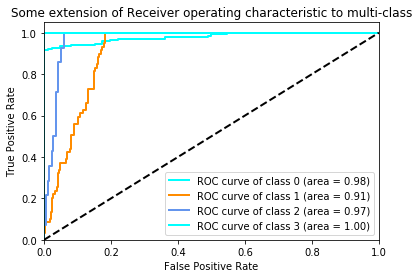

In [147]:
compute_ROC(clf, X, Y)

#  Decision Tree

In [148]:
clf = DecisionTreeClassifier(random_state=0,criterion="gini")

In [149]:
clf.fit(xTrain, yTrain)
print("Accuracy is : ", clf.score(xTest,yTest)*100)


Accuracy is :  95.18304431599229


In [150]:
ypred = clf.predict(xTest)

In [151]:
F1_s = f1_score(yTest, ypred, average='micro')
print("F1 score is (micro) = ", F1_s)
F1_s = f1_score(yTest, ypred, average='macro')
print("F1 score is (macro) = ", F1_s)

F1 score is (micro) =  0.9518304431599229
F1 score is (macro) =  0.9017987153398398


In [152]:
print(confusion_matrix(yTest, ypred))

[[101   5   8   1]
 [  3  21   0   1]
 [  6   0 357   0]
 [  1   0   0  15]]


In [153]:
# ROC Code goes here
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier


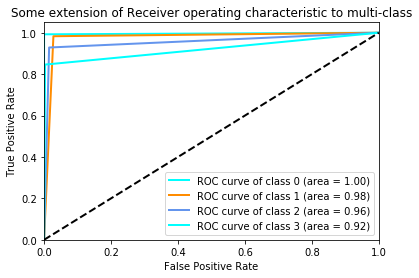

In [154]:
compute_ROC(clf, X, Y)

#  K means Cluster

In [155]:
from sklearn.cluster import KMeans


In [156]:
dataset = pd.read_csv("car_evaluation.csv")
Y = dataset["Decision"]
X = dataset.drop(["Decision"], axis = 1)
X = X.apply(preprocessing.LabelEncoder().fit_transform)
X = one_hot(X,columns)


In [157]:
X  = X.to_numpy()
Y = Y.to_numpy()

In [158]:
def DictWC(Poss):
    Full = []
    for P in Poss:
        ind = {}
        for i , label in enumerate(P):
            ind[label] =i 
        Full.append(ind)
    return Full

In [159]:
def getPred(comb,Y):
    lst =[]
    for yi in Y:
        lst.append(comb[yi])       
    return np.array(lst)
        

In [160]:
def FindAcc(Dic,Y, Kboys):
    localacc = -1
    for comb in Dic:
        Ypred = getPred(comb,Y)
        accuracy = accuracy_score(Ypred,Kboys)
        if accuracy > localacc:
            localacc = accuracy
            
    return localacc

In [161]:
kmeans = KMeans(n_clusters = 1)
kmeans.fit(X)
labels = kmeans.labels_

Uniquelabels = np.unique(Y)
AllPos = permutations(Uniquelabels)
Dic = DictWC(AllPos)
# print(Dic)
print("Accuracy is with 1 cluster = " ,FindAcc(Dic,Y,labels)*100)

Accuracy is with 1 cluster =  70.02314814814815


In [162]:
kmeans = KMeans(n_clusters = 2)
kmeans.fit(X)
labels = kmeans.labels_

Uniquelabels = np.unique(Y)
AllPos = permutations(Uniquelabels)
Dic = DictWC(AllPos)
# print(Dic)
print("Accuracy is with 2 cluster = " ,FindAcc(Dic,Y,labels)*100)

Accuracy is with 2 cluster =  47.74305555555556


In [163]:
kmeans = KMeans(n_clusters = 3)
kmeans.fit(X)
labels = kmeans.labels_

Uniquelabels = np.unique(Y)
AllPos = permutations(Uniquelabels)
Dic = DictWC(AllPos)
# print(Dic)
print("Accuracy is with 3 cluster = " ,FindAcc(Dic,Y,labels)*100)

Accuracy is with 3 cluster =  34.83796296296296


In [164]:
kmeans = KMeans(n_clusters = 4)
kmeans.fit(X)
labels = kmeans.labels_

Uniquelabels = np.unique(Y)
AllPos = permutations(Uniquelabels)
Dic = DictWC(AllPos)
# print(Dic)
print("Accuracy is with 4 cluster = " ,FindAcc(Dic,Y,labels)*100)

Accuracy is with 4 cluster =  28.182870370370374


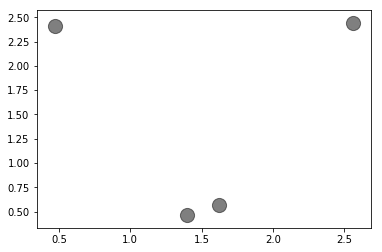

In [165]:
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);


We cannot visualize this data as TOO many attributes are visible but we can show the centroids of the data. The accuracy is 28 percent which is very low.

As you can see, the accuracy drops RAPIDLY when clusters are increased. The reason being, the data is HIGHLY Favourable to some classes and not enough instances of the other classes exist. This can be seen in the data as well. Class 1 and 3 are present way more, hence a bias exists